# Assigment 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random


In [2]:
DATA_DIR = '/apps/local/shared/HC701/assessment/assignment_3/data'

In [3]:
os.listdir(DATA_DIR)

['hc701_lits_test.csv', 'hc701_lits_train.csv', 'lits-png']

In [4]:
train_df = pd.read_csv(os.path.join(DATA_DIR, 'hc701_lits_train.csv'))
test_df = pd.read_csv(os.path.join(DATA_DIR, 'hc701_lits_test.csv'))

In [5]:
# create absolute path
train_df['filepath'] = train_df.apply(lambda x: os.path.join(DATA_DIR, x['filepath']), axis=1)
train_df['liver_maskpath'] = train_df.apply(lambda x: os.path.join(DATA_DIR, x['liver_maskpath']), axis=1)
train_df['tumor_maskpath'] = train_df.apply(lambda x: os.path.join(DATA_DIR, x['tumor_maskpath']), axis=1)

test_df['filepath'] = test_df.apply(lambda x: os.path.join(DATA_DIR, x['filepath']), axis=1)
test_df['liver_maskpath'] = test_df.apply(lambda x: os.path.join(DATA_DIR, x['liver_maskpath']), axis=1)
test_df['tumor_maskpath'] = test_df.apply(lambda x: os.path.join(DATA_DIR, x['tumor_maskpath']), axis=1)

In [6]:
train_df.head()

,filepath,liver_maskpath,tumor_maskpath,study_number,instance_number,liver_mask_empty,tumor_mask_empty
0,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
1,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
2,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
3,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,1,False,False
4,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,1,False,False


In [7]:
test_df.head()

,filepath,liver_maskpath,tumor_maskpath,study_number,instance_number,liver_mask_empty,tumor_mask_empty
0,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,116,0,False,False
1,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,116,0,False,False
2,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,116,0,True,True
3,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,116,0,False,False
4,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,116,1,False,False


## Random visualization and checking

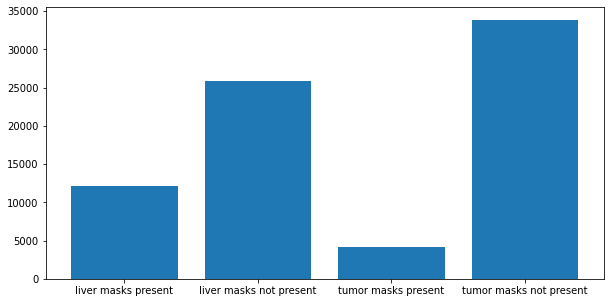

In [8]:
# checking the ratio of masks to no masks images
# *_empty columns are False for empty masks only and True for non-empty masks 
liver_masks_present_df = train_df[train_df['liver_mask_empty'] == True]
liver_masks_not_present_df = train_df[train_df['liver_mask_empty'] == False]
tumor_masks_present_df = train_df[train_df['tumor_mask_empty'] == True] # both masks present
tumor_masks_not_present_df = train_df[train_df['tumor_mask_empty'] == False] # liver masks present but tumor masks not present

plt.figure(figsize=(10, 5))

plt.bar(['liver masks present', 'liver masks not present', 'tumor masks present', 'tumor masks not present'], [len(liver_masks_present_df), len(liver_masks_not_present_df), len(tumor_masks_present_df), len(tumor_masks_not_present_df)])
plt.show()


In [9]:
(1/(len(tumor_masks_present_df)/len(train_df))) / (1/(len(liver_masks_present_df)/len(train_df)))

2.9353823814133593

In [10]:
pick = random.randint(0, len(train_df))
sample = train_df.iloc[pick]

i = plt.imread(sample['filepath'])
m1 = plt.imread(sample['liver_maskpath'])
m2 = plt.imread(sample['tumor_maskpath'])



In [11]:
m1.min(), m1.max()*255, m2.min(), m2.max(), i.min(), i.max()

(0.0, 0.0, 0.0, 0.0, 0.0, 1.0)

filepath            /apps/local/shared/HC701/assessment/assignment...
liver_maskpath      /apps/local/shared/HC701/assessment/assignment...
tumor_maskpath      /apps/local/shared/HC701/assessment/assignment...
study_number                                                       65
instance_number                                                    19
liver_mask_empty                                                False
tumor_mask_empty                                                False
Name: 15697, dtype: object


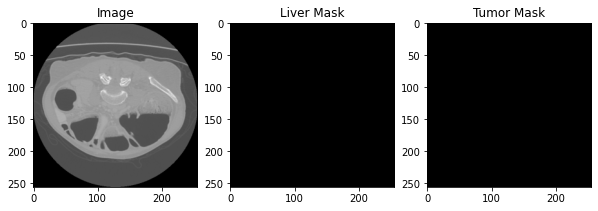

In [12]:
pick = random.randint(0, len(train_df))
sample = train_df.iloc[pick]
print(sample)
plt.figure(figsize=(10, 20))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread(sample['filepath']))
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(plt.imread(sample['liver_maskpath'])*255)
plt.title('Liver Mask')
plt.subplot(1, 3, 3)
plt.imshow(plt.imread(sample['tumor_maskpath'])*255)
plt.title('Tumor Mask')
plt.show()

In [13]:
img = plt.imread(sample['filepath'])
img.shape, img.min(), img.max()

((256, 256, 3), 0.0, 1.0)

## Sample Validation data (based on study number i.e. patients)

In [14]:
print(f'total number of training images: {len(train_df)}')
print(f'total number of studies / patients: {len(train_df["study_number"].unique())}')
print(f'total number of instances: {len(train_df["instance_number"].unique())}')

total number of training images: 37975
total number of studies / patients: 84
total number of instances: 256


In [15]:
print(f'total number of training images: {len(test_df)}')
print(f'total number of studies / patients: {len(test_df["study_number"].unique())}')
print(f'total number of instances: {len(test_df["instance_number"].unique())}')

total number of training images: 3586
total number of studies / patients: 7
total number of instances: 256


In [18]:
# let's sample images with liver masks present

train_df_liver_masks_present = train_df[train_df['liver_mask_empty'] == True]

filepath            /apps/local/shared/HC701/assessment/assignment...
liver_maskpath      /apps/local/shared/HC701/assessment/assignment...
tumor_maskpath      /apps/local/shared/HC701/assessment/assignment...
study_number                                                      114
instance_number                                                   160
liver_mask_empty                                                 True
tumor_mask_empty                                                False
Name: 33804, dtype: object


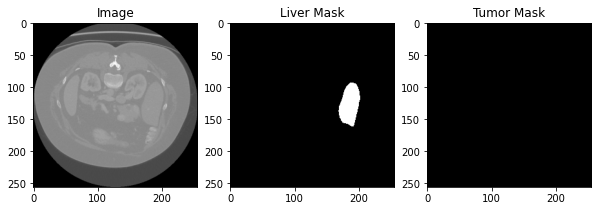

In [24]:
pick = random.randint(0, len(train_df_liver_masks_present))
sample = train_df_liver_masks_present.iloc[pick]
print(sample)
plt.figure(figsize=(10, 20))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread(sample['filepath']))
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(plt.imread(sample['liver_maskpath'])*255)
plt.title('Liver Mask')
plt.subplot(1, 3, 3)
plt.imshow(plt.imread(sample['tumor_maskpath'])*255)
plt.title('Tumor Mask')
plt.show()

In [25]:
len(train_df_liver_masks_present)

12129

In [26]:
val_set_ratio = 0.2
val_set_size = int(len(train_df['study_number'].unique()) * val_set_ratio)
val_set_size

16

In [27]:
random.seed(42)
val_imgs = random.sample(list(train_df['study_number'].unique()), val_set_size)
val_imgs

[92, 20, 5, 59, 53, 49, 23, 18, 111, 15, 86, 6, 125, 41, 47, 50]

In [28]:
val_df = train_df[train_df['study_number'].isin(val_imgs)]
new_train_df = train_df[~train_df['study_number'].isin(val_imgs)]

### sanity check for overlap

In [29]:
# print()

for i in new_train_df['filepath']:
    if  i in val_df['filepath']:
        print(i)


for i in val_df['filepath']:
    if  i in new_train_df['filepath']:
        print(i)



In [30]:
val_df.head()

,filepath,liver_maskpath,tumor_maskpath,study_number,instance_number,liver_mask_empty,tumor_mask_empty
1892,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,5,0,False,False
1893,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,5,0,False,False
1894,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,5,0,False,False
1895,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,5,1,False,False
1896,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,5,1,False,False


In [31]:
os.makedirs('./csv_liver_present', exist_ok=True)

new_train_df.to_csv('./csv_liver_present/train.csv', index=False)
val_df.to_csv('./csv_liver_present/val.csv', index=False)
test_df.to_csv('./csv_liver_present/test.csv', index=False)